# Solutions for block C

In [1]:
import geopandas, osmnx, contextily

In [2]:
osmnx.config(
    overpass_settings='[out:json][timeout:90][date:"2020-09-07T00:00:00Z"]'
)

- Polygons

**Note** this will probably look slightly different on your computer, based on where you've placed the dataset yourself

In [3]:
p = (
    "../../data/Census_Residential_Data_Pack_2011/"
    "Local_Authority_Districts/"
    "E08000012/shapefiles/E08000012.shp"
)
p

'../../data/Census_Residential_Data_Pack_2011/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp'

In [4]:
liv = geopandas.read_file(p)

- Lines

In [5]:
bikepaths = osmnx.graph_from_place("Liverpool, UK", network_type="bike")

---

Note the code cell above requires internet connectivity. If you are not online but have a full copy of the GDS course in your computer (downloaded as suggested in the [infrastructure page](../infrastructure)), you can read the data with the following line of code: 

In [6]:
bikepaths = osmnx.load_graphml("../data/web_cache/bikepaths_liverpool.graphml")

---

- Points

In [7]:
pubs = osmnx.geometries_from_place(
    "Liverpool, UK", tags={"amenity": "pub"}
)

---

Note the code cell above requires internet connectivity. If you are not online but have a full copy of the GDS course in your computer (downloaded as suggested in the [infrastructure page](../infrastructure)), you can read the data with the following line of code: 

In [8]:
pubs = geopandas.read_parquet("../data/web_cache/pois_bars_liverpool.parquet")

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---

## Task I

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


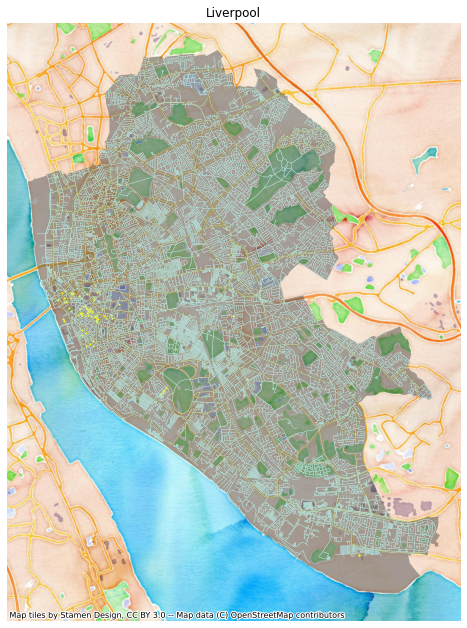

In [9]:
ax = liv.plot(
    color="#525252",
    linewidth=0.3,
    alpha=0.5, 
    figsize=(10, 11)
)
osmnx.graph_to_gdfs(
    bikepaths, nodes=False
).to_crs(
    liv.crs
).plot(
    ax=ax, 
    linewidth=0.3, 
    color="#B9EBE3"
)
pubs.to_crs(
    liv.crs
).plot(
    ax=ax, 
    color="yellow", 
    markersize=1
)
ax.set_title("Liverpool")
ax.set_axis_off()
contextily.add_basemap(
    ax, 
    crs=liv.crs,
    source=contextily.providers.Stamen.Watercolor
)

## Task II

- Area

In [10]:
areas = liv.area

- Five smallest can be found by sorting the areas and picking the top of the table

In [11]:
smallest = areas.sort_values().head()
smallest

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


295    62937.688835
286    74808.839471
296    75800.597457
95     79397.571389
92     86071.394231
dtype: float64

- Multilayer map

<AxesSubplot:>

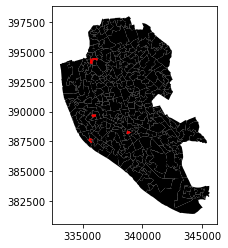

In [12]:
ax = liv.plot(color="k")
liv.reindex(smallest.index)\
   .plot(ax=ax, color="red")

## Task III

- Read data

In [13]:
url = (
    "https://github.com/geochicasosm/lascallesdelasmujeres"
    "/raw/master/data/zaragoza/final_tile.geojson"
)
streets = geopandas.read_file(url).to_crs(epsg=25830)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- Split by gender

In [14]:
men = streets.query("gender == 'Male'")
women = streets.query("gender == 'Female'")

- Calculate lengths (divide by 1,000 so length is in Km)

In [15]:
total_men = men.length.sum() / 1000
total_women = women.length.sum() / 1000

In [16]:
total_men

398.18565507454537

In [17]:
total_women

89.06923496393888